# IBM Data Science Capstone Project

## Predicting possible road accident severity in Seattle,WA

### 1. Importing Libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

### 2. Importing File

In [2]:
file = pd.read_csv(r'C:\Users\admin\Desktop\Data-Collisions.csv')
df = pd.DataFrame(file)
print(df.columns)
print(df.shape)
print(df.dtypes)olumns)
print(df)

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')
        SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.30642

### 3. Data Preparation and Cleaning

In [3]:
print(df['UNDERINFL'].value_counts())

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64


In [4]:
df['UNDERINFL'] = df['UNDERINFL'].replace({'N':0, 'Y':1, '0':0, '1':1})
print(df['UNDERINFL'].value_counts())

0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64


In [5]:
print(df['WEATHER'].value_counts())

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [6]:
df['WEATHER'] = df['WEATHER'].replace({'Unknown':0, 'Clear':1,'Other':2,'Snowing':10, 'Raining':7,'Sleet/Hail/Freezing Rain':9, 'Overcast':4, 'Partly Cloudy':3, 'Severe Crosswind':5, 'Blowing Sand/Dirt':6, 'Fog/Smog/Smoke':8})
print(df['WEATHER'].value_counts())

1.0     111135
7.0      33145
4.0      27714
0.0      15091
10.0       907
2.0        832
8.0        569
9.0        113
6.0         56
5.0         25
3.0          5
Name: WEATHER, dtype: int64


In [7]:
print(df['ROADCOND'].value_counts())

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [8]:
df['ROADCOND'] = df['ROADCOND'].replace({'Unknown':0, '0':0, 'Ice':1,'Sand/Mud/Dirt':2,'Snow/Slush':4, 'Other':7, 'Oil':3, 'Standing Water':5, 'Wet':6, 'Dry':8})
print(df['ROADCOND'].value_counts())

8.0    124510
6.0     47474
0.0     15078
1.0      1209
4.0      1004
7.0       132
5.0       115
2.0        75
3.0        64
Name: ROADCOND, dtype: int64


In [9]:
print(df['LIGHTCOND'].value_counts())

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


In [10]:
df['LIGHTCOND'] = df['LIGHTCOND'].replace({'Unknown':0, '0':0, 'Dark - Street Lights Off':2, 'Dark - No Street Lights':1,'Other':7, 'Dark - Street Lights On':4, 'Dark - Unknown Lighting':3, 'Dusk':5, 'Dawn':6, 'Daylight':8})
print(df['LIGHTCOND'].value_counts())

8.0    116137
4.0     48507
0.0     13473
5.0      5902
6.0      2502
1.0      1537
2.0      1199
7.0       235
3.0        11
Name: LIGHTCOND, dtype: int64


In [11]:
print(df['INATTENTIONIND'].value_counts())

Y    29805
Name: INATTENTIONIND, dtype: int64


In [12]:
print(df['INATTENTIONIND'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
194668    NaN
194669      Y
194670    NaN
194671    NaN
194672    NaN
Name: INATTENTIONIND, Length: 194673, dtype: object


In [13]:
df['INATTENTIONIND'] = df['INATTENTIONIND'].fillna(0)
df['INATTENTIONIND'] = df['INATTENTIONIND'].replace({'Y':1})
print(df['INATTENTIONIND'].value_counts())

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64


In [14]:
print(df['SPEEDING'].value_counts())

Y    9333
Name: SPEEDING, dtype: int64


In [15]:
print(df['SPEEDING'])

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
194668    NaN
194669    NaN
194670    NaN
194671    NaN
194672    NaN
Name: SPEEDING, Length: 194673, dtype: object


In [16]:
df['SPEEDING'] = df['SPEEDING'].fillna(0)
df['SPEEDING'] = df['SPEEDING'].replace({'Y':1})
print(df['SPEEDING'].value_counts())

0    185340
1      9333
Name: SPEEDING, dtype: int64


In [17]:
df.drop(['X', 'Y', 'OBJECTID','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT', 'SEVERITYDESC','JUNCTIONTYPE', 'SDOTCOLNUM', 'PEDROWNOTGRNT', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'INCDTTM','EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE','ST_COLCODE','HITPARKEDCAR','SDOT_COLCODE','SDOT_COLDESC', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis = 1, inplace = True)
df.rename(columns = {'SEVERITYCODE':'severity','SPEEDING':'speeding', 'INATTENTIONIND':'inattention', 'UNDERINFL':'influence', 'WEATHER':'weather','ROADCOND':'road','LIGHTCOND':'light'}, inplace = True)
print(df.columns)
print(df.shape)
df = df.fillna(0)
df = df.astype(int)
print(df.dtypes)
print(df)

Index(['severity', 'inattention', 'influence', 'weather', 'road', 'light',
       'speeding'],
      dtype='object')
(194673, 7)
severity       int32
inattention    int32
influence      int32
weather        int32
road           int32
light          int32
speeding       int32
dtype: object
        severity  inattention  influence  weather  road  light  speeding
0              2            0          0        4     6      8         0
1              1            0          0        7     6      4         0
2              1            0          0        4     8      8         0
3              1            0          0        1     8      8         0
4              2            0          0        7     6      8         0
...          ...          ...        ...      ...   ...    ...       ...
194668         2            0          0        1     8      8         0
194669         1            1          0        7     6      8         0
194670         2            0          0        1    

### 4. Exploratory Data Analysis

#### 4.1. Relationship between Severity and Weather

In [18]:
df_ws = df[['severity','weather']]
df_ws = df_ws.sort_values(by = ['severity','weather'])
df_ws1 = df_ws[df_ws['severity'] == 1]
df_ws1 = df_ws1.groupby('weather').count()
df_ws1.rename(columns = {'severity' : 1}, inplace = True)
print(df_ws1)
df_ws2 = df_ws[df_ws['severity'] == 2]
df_ws2 = df_ws2.groupby('weather').count()
df_ws2.rename(columns = {'severity' : 2}, inplace = True)
print(df_ws2)
dff_ws = pd.concat([df_ws1,df_ws2], axis = 1, join = 'inner')
dff_ws.index.name = None
print(dff_ws)

             1
weather       
0        18272
1        75295
2          716
3            2
4        18969
5           18
6           41
7        21969
8          382
9           85
10         736
             2
weather       
0         1900
1        35840
2          116
3            3
4         8745
5            7
6           15
7        11176
8          187
9           28
10         171
        1      2
0   18272   1900
1   75295  35840
2     716    116
3       2      3
4   18969   8745
5      18      7
6      41     15
7   21969  11176
8     382    187
9      85     28
10    736    171


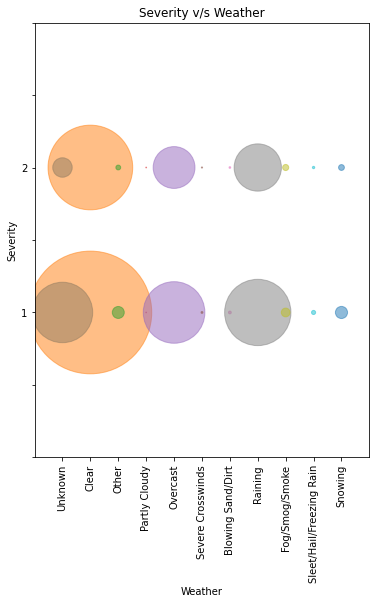

In [19]:
n = 0
plt.figure(figsize = (6,8))
plt.xlim(-1,11)
plt.ylim(0,3)
while n<11:
    plt.scatter([n,n],[1,2], s = dff_ws.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Weather')
plt.xlabel('Weather')
plt.ylabel('Severity')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Unknown', 'Clear', 'Other','Partly Cloudy','Overcast','Severe Crosswinds','Blowing Sand/Dirt','Raining','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Snowing'],rotation=90)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

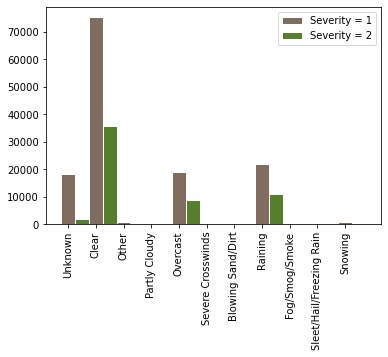

In [22]:
barWidth = 0.5
bars1 = dff_ws[1]
bars2 = dff_ws[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Unknown', 'Clear', 'Other','Partly Cloudy','Overcast','Severe Crosswinds','Blowing Sand/Dirt','Raining','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Snowing'],rotation=90)
plt.legend()
plt.show()

#### 4.2. Relationship between Severity and Light conditions on the road

In [24]:
df_ls = df[['severity','light']]
df_ls = df_ls.sort_values(by = ['severity','light'])
df_ls1 = df_ls[df_ls['severity'] == 1]
df_ls1 = df_ls1.groupby('light').count()
df_ls1.rename(columns = {'severity' : 1}, inplace = True)
print(df_ls1)
df_ls2 = df_ls[df_ls['severity'] == 2]
df_ls2 = df_ls2.groupby('light').count()
df_ls2.rename(columns = {'severity' : 2}, inplace = True)
print(df_ls2)
dff_ls = pd.concat([df_ls1,df_ls2], axis = 1, join = 'inner')
dff_ls.index.name = None
print(dff_ls)

           1
light       
0      16948
1       1203
2        883
3          7
4      34032
5       3958
6       1678
7        183
8      77593
           2
light       
0       1695
1        334
2        316
3          4
4      14475
5       1944
6        824
7         52
8      38544
       1      2
0  16948   1695
1   1203    334
2    883    316
3      7      4
4  34032  14475
5   3958   1944
6   1678    824
7    183     52
8  77593  38544


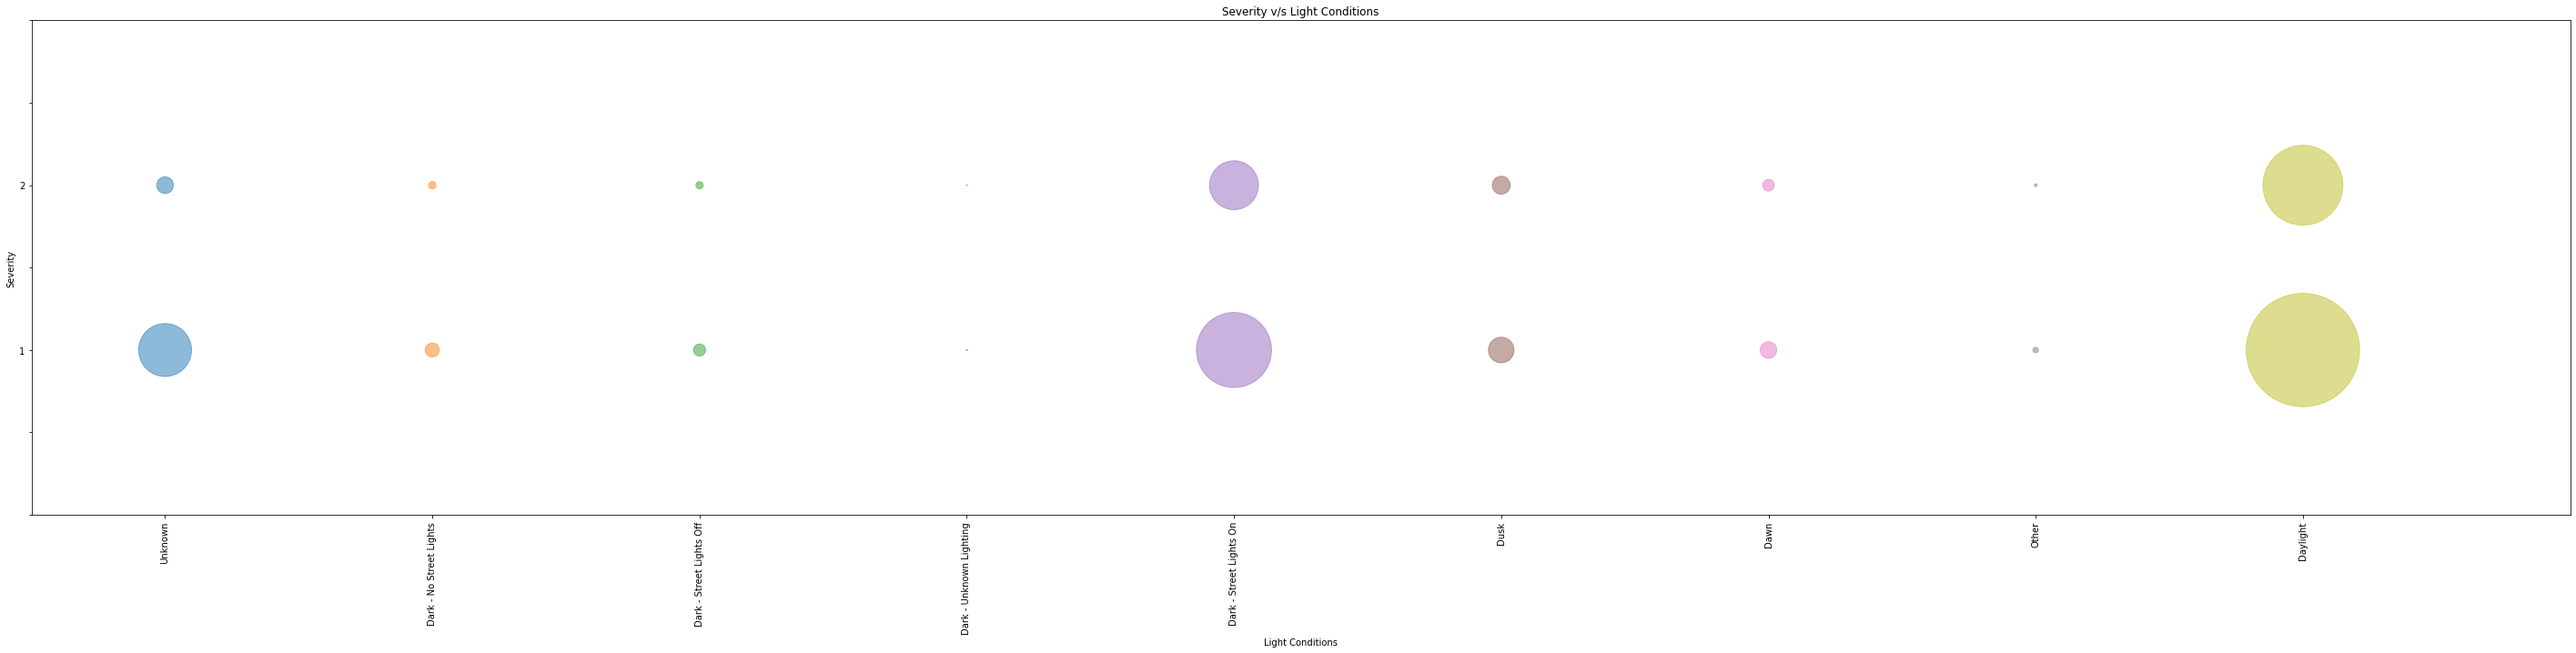

In [25]:
n = 0
plt.figure(figsize = (50,10))
plt.xlim(-0.5,9)
plt.ylim(0,3)
while n<9:
    plt.scatter([n,n],[1,2], s = dff_ls.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Severity')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['Unknown', 'Dark - No Street Lights', 'Dark - Street Lights Off','Dark - Unknown Lighting','Dark - Street Lights On','Dusk','Dawn','Other','Daylight'],rotation=90)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

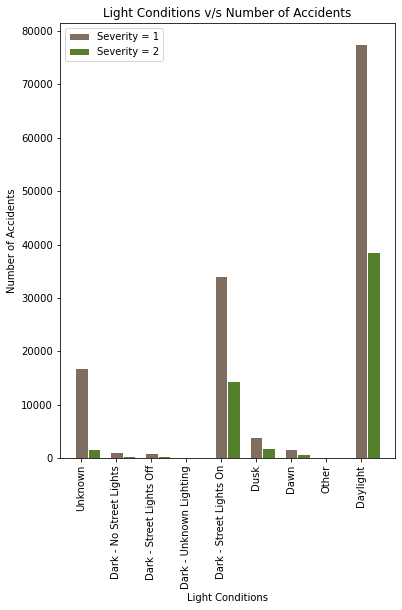

In [26]:
plt.figure(figsize = (6,8))
barWidth = 0.35
bars1 = dff_ls[1]
bars2 = dff_ls[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['Unknown', 'Dark - No Street Lights', 'Dark - Street Lights Off','Dark - Unknown Lighting','Dark - Street Lights On','Dusk','Dawn','Other','Daylight'],rotation=90)
plt.xlabel('Light Conditions')
plt.title('Light Conditions v/s Number of Accidents')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

#### 4.3. Relationship between Severity and Road Conditions

In [27]:
df_rs = df[['severity','road']]
df_rs = df_rs.sort_values(by = ['severity','road'])
df_rs1 = df_rs[df_rs['severity'] == 1]
df_rs1 = df_rs1.groupby('road').count()
df_rs1.rename(columns = {'severity' : 1}, inplace = True)
print(df_rs1)
df_rs2 = df_rs[df_rs['severity'] == 2]
df_rs2 = df_rs2.groupby('road').count()
df_rs2.rename(columns = {'severity' : 2}, inplace = True)
print(df_rs2)
dff_rs = pd.concat([df_rs1,df_rs2], axis = 1, join = 'inner')
dff_rs.index.name = None
print(dff_rs)

          1
road       
0     18281
1       936
2        52
3        40
4       837
5        85
6     31719
7        89
8     84446
          2
road       
0      1809
1       273
2        23
3        24
4       167
5        30
6     15755
7        43
8     40064
       1      2
0  18281   1809
1    936    273
2     52     23
3     40     24
4    837    167
5     85     30
6  31719  15755
7     89     43
8  84446  40064


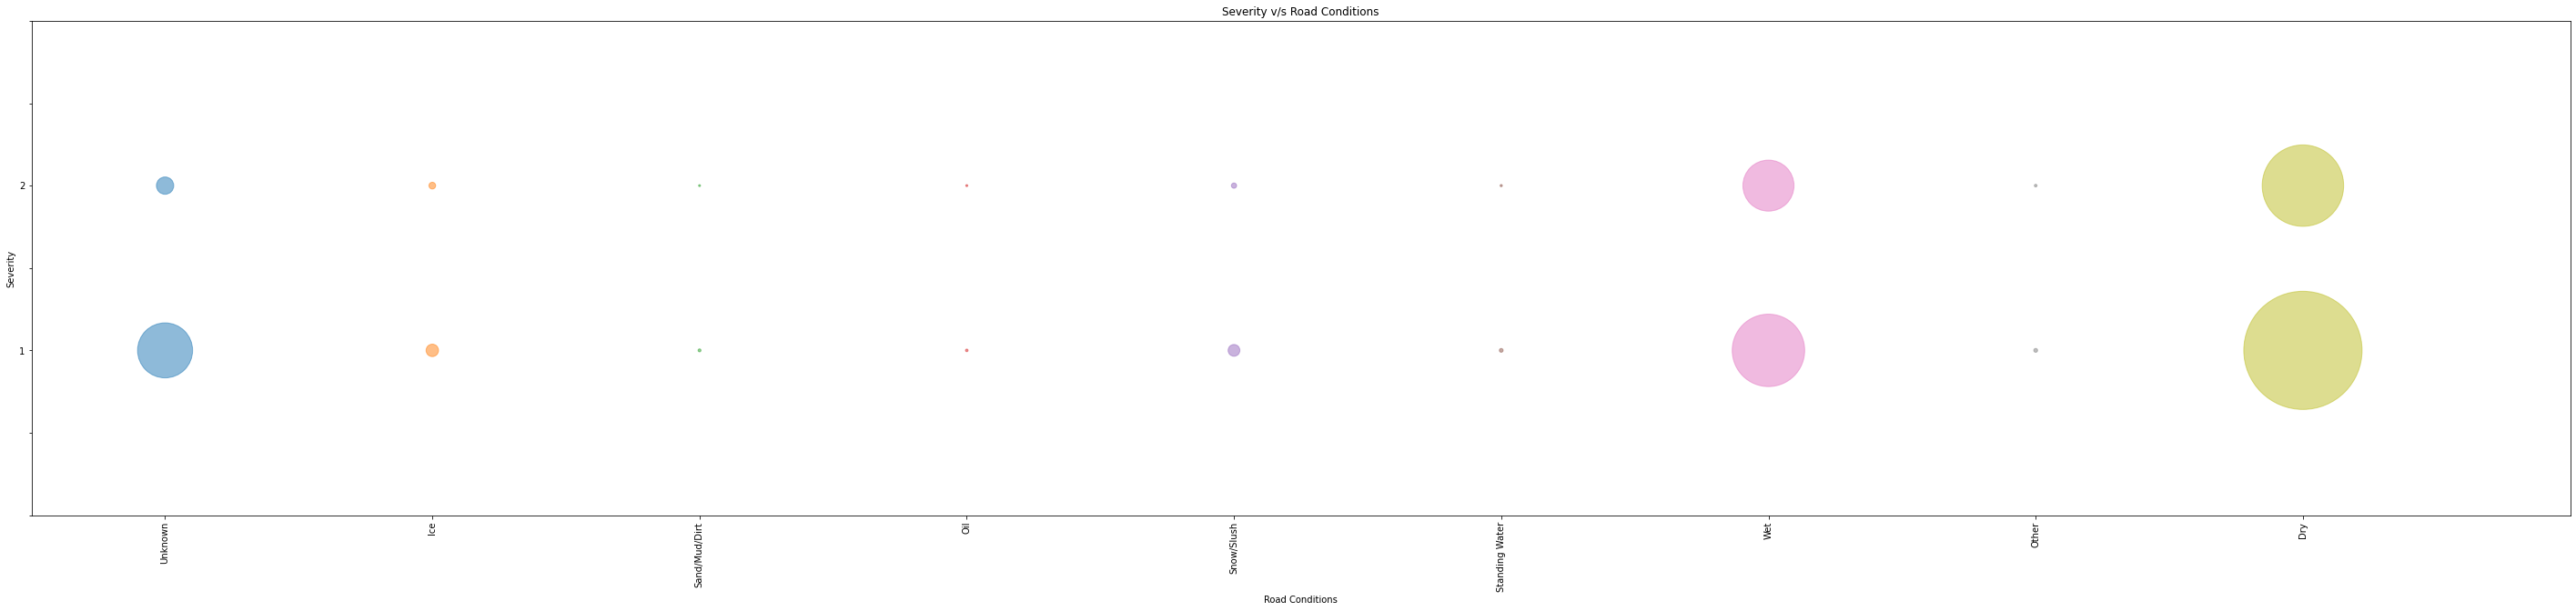

In [28]:
n = 0
plt.figure(figsize = (50,10))
plt.xlim(-0.5,9)
plt.ylim(0,3)
while n<9:
    plt.scatter([n,n],[1,2], s = dff_rs.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Severity')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['Unknown', 'Ice', 'Sand/Mud/Dirt','Oil','Snow/Slush','Standing Water','Wet','Other','Dry'],rotation=90)
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

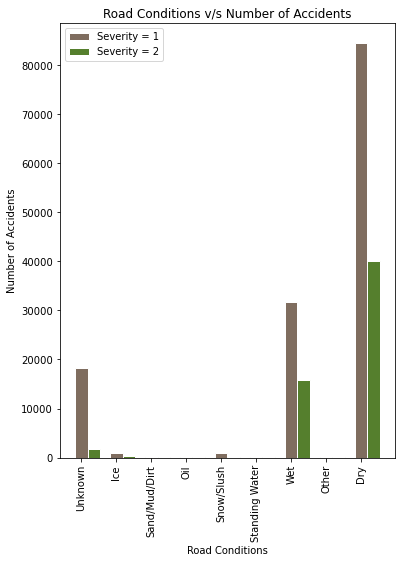

In [29]:
plt.figure(figsize = (6,8))
barWidth = 0.35
bars1 = dff_rs[1]
bars2 = dff_rs[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['Unknown', 'Ice', 'Sand/Mud/Dirt','Oil','Snow/Slush','Standing Water','Wet','Other','Dry'],rotation=90)
plt.xlabel('Road Conditions')
plt.title('Road Conditions v/s Number of Accidents')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

#### 4.4. Relationship between Severity and Speeding

In [30]:
df_ss = df[['severity','speeding']]
df_ss = df_ss.sort_values(by = ['severity','speeding'])
df_ss1 = df_ss[df_ss['severity'] == 1]
df_ss1 = df_ss1.groupby('speeding').count()
df_ss1.rename(columns = {'severity' : 1}, inplace = True)
print(df_ss1)
df_ss2 = df_ss[df_ss['severity'] == 2]
df_ss2 = df_ss2.groupby('speeding').count()
df_ss2.rename(columns = {'severity' : 2}, inplace = True)
print(df_ss2)
dff_ss = pd.concat([df_ss1,df_ss2], axis = 1, join = 'inner')
dff_ss.index.name = None
print(dff_ss)

               1
speeding        
0         130683
1           5802
              2
speeding       
0         54657
1          3531
        1      2
0  130683  54657
1    5802   3531


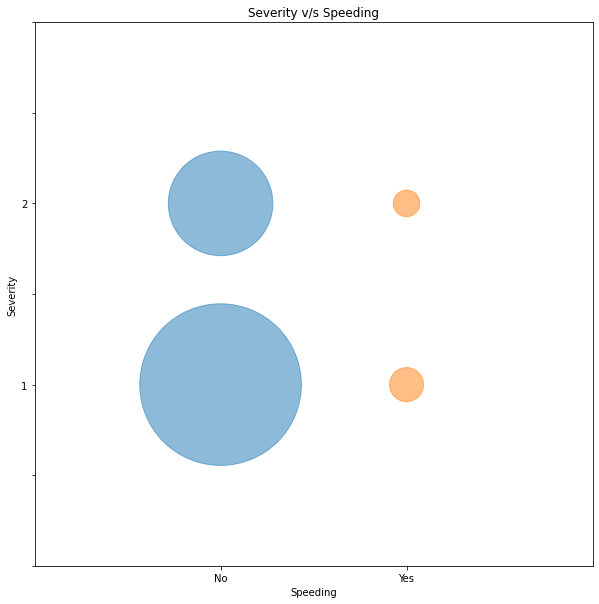

In [31]:
n = 0
plt.figure(figsize = (10,10))
plt.xlim(-1,2)
plt.ylim(0,3)
while n<2:
    plt.scatter([n,n],[1,2], s = dff_ss.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Speeding')
plt.xlabel('Speeding')
plt.ylabel('Severity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

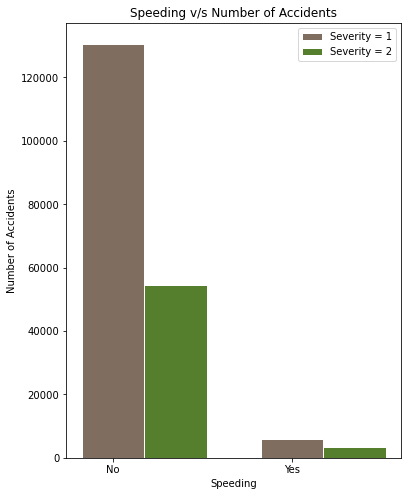

In [32]:
plt.figure(figsize = (6,8))
barWidth = 0.35
bars1 = dff_ss[1]
bars2 = dff_ss[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Speeding')
plt.title('Speeding v/s Number of Accidents')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

#### 4.5. Relationship between Severity and Influence of Drugs

In [33]:
df_is = df[['severity','influence']]
df_is = df_is.sort_values(by = ['severity','influence'])
df_is1 = df_is[df_is['severity'] == 1]
df_is1 = df_is1.groupby('influence').count()
df_is1.rename(columns = {'severity' : 1}, inplace = True)
print(df_is1)
df_is2 = df_is[df_is['severity'] == 2]
df_is2 = df_is2.groupby('influence').count()
df_is2.rename(columns = {'severity' : 2}, inplace = True)
print(df_is2)
dff_is = pd.concat([df_is1,df_is2], axis = 1, join = 'inner')
dff_is.index.name = None
print(dff_is)

                1
influence        
0          130926
1            5559
               2
influence       
0          54626
1           3562
        1      2
0  130926  54626
1    5559   3562


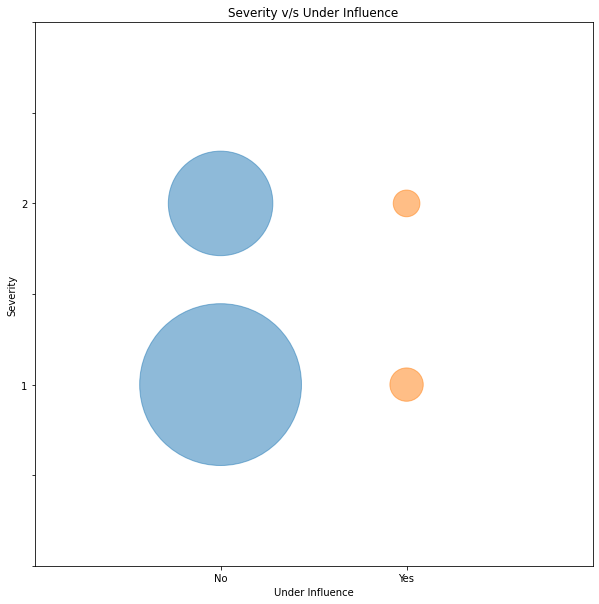

In [34]:
n = 0
plt.figure(figsize = (10,10))
plt.xlim(-1,2)
plt.ylim(0,3)
while n<2:
    plt.scatter([n,n],[1,2], s = dff_is.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Under Influence')
plt.xlabel('Under Influence')
plt.ylabel('Severity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

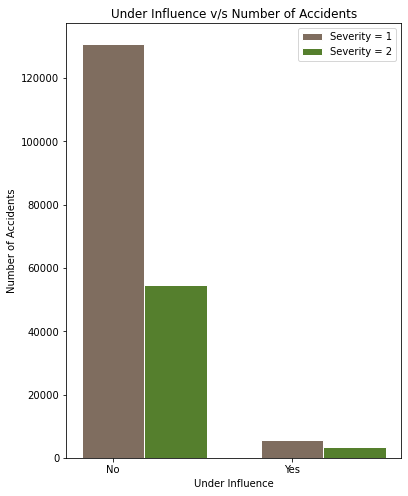

In [35]:
plt.figure(figsize = (6,8))
barWidth = 0.35
bars1 = dff_is[1]
bars2 = dff_is[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Under Influence')
plt.title('Under Influence v/s Number of Accidents')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

#### 4.6. Relationship between Severity and Inattention

In [36]:
df_as = df[['severity','inattention']]
df_as = df_as.sort_values(by = ['severity','inattention'])
df_as1 = df_as[df_as['severity'] == 1]
df_as1 = df_as1.groupby('inattention').count()
df_as1.rename(columns = {'severity' : 1}, inplace = True)
print(df_as1)
df_as2 = df_as[df_as['severity'] == 2]
df_as2 = df_as2.groupby('inattention').count()
df_as2.rename(columns = {'severity' : 2}, inplace = True)
print(df_as2)
dff_as = pd.concat([df_as1,df_as2], axis = 1, join = 'inner')
dff_as.index.name = None
print(dff_as)

                  1
inattention        
0            117077
1             19408
                 2
inattention       
0            47791
1            10397
        1      2
0  117077  47791
1   19408  10397


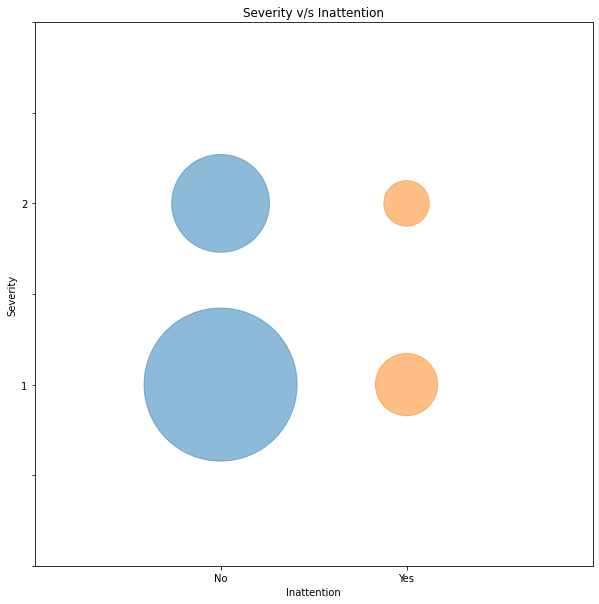

In [37]:
n = 0
plt.figure(figsize = (10,10))
plt.xlim(-1,2)
plt.ylim(0,3)
while n<2:
    plt.scatter([n,n],[1,2], s = dff_as.loc[n]/5, alpha = 0.5)
    n = n+1
plt.title('Severity v/s Inattention')
plt.xlabel('Inattention')
plt.ylabel('Severity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0,0.5,1,1.5,2,2.5,3],['','','1','','2','',''])
plt.show()

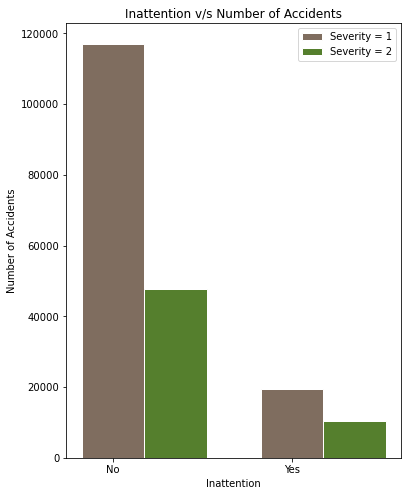

In [38]:
plt.figure(figsize = (6,8))
barWidth = 0.35
bars1 = dff_as[1]
bars2 = dff_as[2]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Severity = 1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Severity = 2')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Inattention')
plt.title('Inattention v/s Number of Accidents')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

### 5. Modelling and Evaluation

#### 5.1. K Nearest Neighbors Model

In [40]:
X = df[['influence','weather','road','light','speeding','inattention']].values
Y = df['severity'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X,Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(neigh)

yhat = neigh.predict(X_test)
print(yhat)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))



[[-0.2217116   0.64176936 -0.24988841  0.73752593 -0.22440165 -0.42518348]
 [-0.2217116   1.85903788 -0.24988841 -0.75757473 -0.22440165 -0.42518348]
 [-0.2217116   0.64176936  0.56121146  0.73752593 -0.22440165 -0.42518348]
 ...
 [-0.2217116  -0.57549916  0.56121146  0.73752593 -0.22440165 -0.42518348]
 [-0.2217116  -0.57549916  0.56121146 -0.38379957 -0.22440165 -0.42518348]
 [-0.2217116  -0.57549916 -0.24988841  0.73752593 -0.22440165 -0.42518348]] [2 1 1 ... 2 2 1]
Train set: (155738, 6) (155738,)
Test set: (38935, 6) (38935,)
KNeighborsClassifier(n_neighbors=4)
[1 2 1 ... 1 2 1]
Train set Accuracy:  0.6718206218135586
Test set Accuracy:  0.6753820470014126


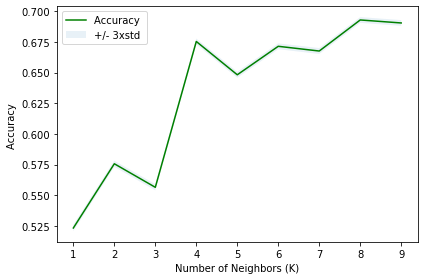

The best accuracy was with 0.692924104276358 with k= 8


In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [42]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
print(neigh)

yhat = neigh.predict(X_test)
print(yhat)

print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

KNeighborsClassifier(n_neighbors=8)
[1 2 1 ... 1 1 1]
Train set Accuracy:  0.6895491145385199
Test set Accuracy:  0.692924104276358


#### 5.2. Decisions Tree Model

In [44]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,Y_train)
predTree = drugTree.predict(X_test)
print (predTree)
print (Y_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

[1 1 1 ... 1 1 1]
[2 1 1 ... 1 1 2]
DecisionTrees's Accuracy:  0.7043790933607295


#### 5.3. Logistic Regression Model

In [46]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
yhat = LR.predict(X_test)
print(yhat)
print(Y_test)
yhat_prob = LR.predict_proba(X_test)
print("Logistic Regression's accuracy: ", metrics.accuracy_score(Y_test, yhat))

[1 1 1 ... 1 1 1]
[2 1 1 ... 1 1 2]
Logistic Regression's accuracy:  0.7044561448568126


#### 5.4. Support Vector Machine Model

In [48]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)
print(yhat [0:5])
print(Y_test [0:5])
print("SVM's Accuracy: ", metrics.accuracy_score(Y_test, yhat))

[1 1 1 1 1]
[2 1 1 2 2]
SVM's Accuracy:  0.7044818286888404


### 6. Conclusion

#### SVM Model has the best accuracy in predicting the severity.